## Overfitting e Underfitting

Tipicamente há 3 estados em que um modelo treinado pode estar:

- Bem ajustado
- Underfit (sub-ajustado)
- Overfit  (sobre-ajustado)

Modelos bem ajustados são aqueles que possuem boa capacidade de generalização, ou seja, apresentam bons resultados para dados novos, não vistos durante o treinamento.

Underfitting ocorre quando o modelo é simples demais para capturar padrões nos dados ou quando há problemas com os dados; Overfitting ocorre quando o modelo é complexo demais para os dados, e parece "memorizar" os dados de treinamento.

Nos dois casos os modelos não possuem boa capacidade de generalização, que é o que queremos.

Underfitting é tipicamente mais fácil de resolver: use um modelo mais complexo e cheque a qualidade dos seus dados; Overfitting requer conseguir mais dados (nem sempre possível) ou utilizar regularização.


### Estratégias comuns para regularização:

1. L1 (weight pruning)
2. L2 (weight decay)

- L1: $J(w) + \alpha \sum_{w \in \mathbf{w}} |w|$
- L2: $J(w) + \alpha \sum_{w \in \mathbf{w}} w^2$

As duas técnicas tornam o problema de otimização mais difícil, mas afetam o modelo de formas diferentes:

- L1 faz com que os valores de $\mathbf{w}$ menos importantes sejam zerados (\emph{weight pruning})
- L2 faz com que os valores de $\mathbf{w}$ sejam reduzidos tal que todos tenham uma contribuição mínima 

Na prática:

- L1 gera modelos mais fáceis de interpretar, por possuírem menos pesos
- L2 gera modelos com desempenho melhor


In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [15, 15]

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np

#define função para criar plots com fronteiras de decisão
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    if type(clf) == Sequential:
        Z = clf.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.tab20)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b, s=5)
    plt.axis('off')


#### Criação de dados de exemplo utilizando make_moons

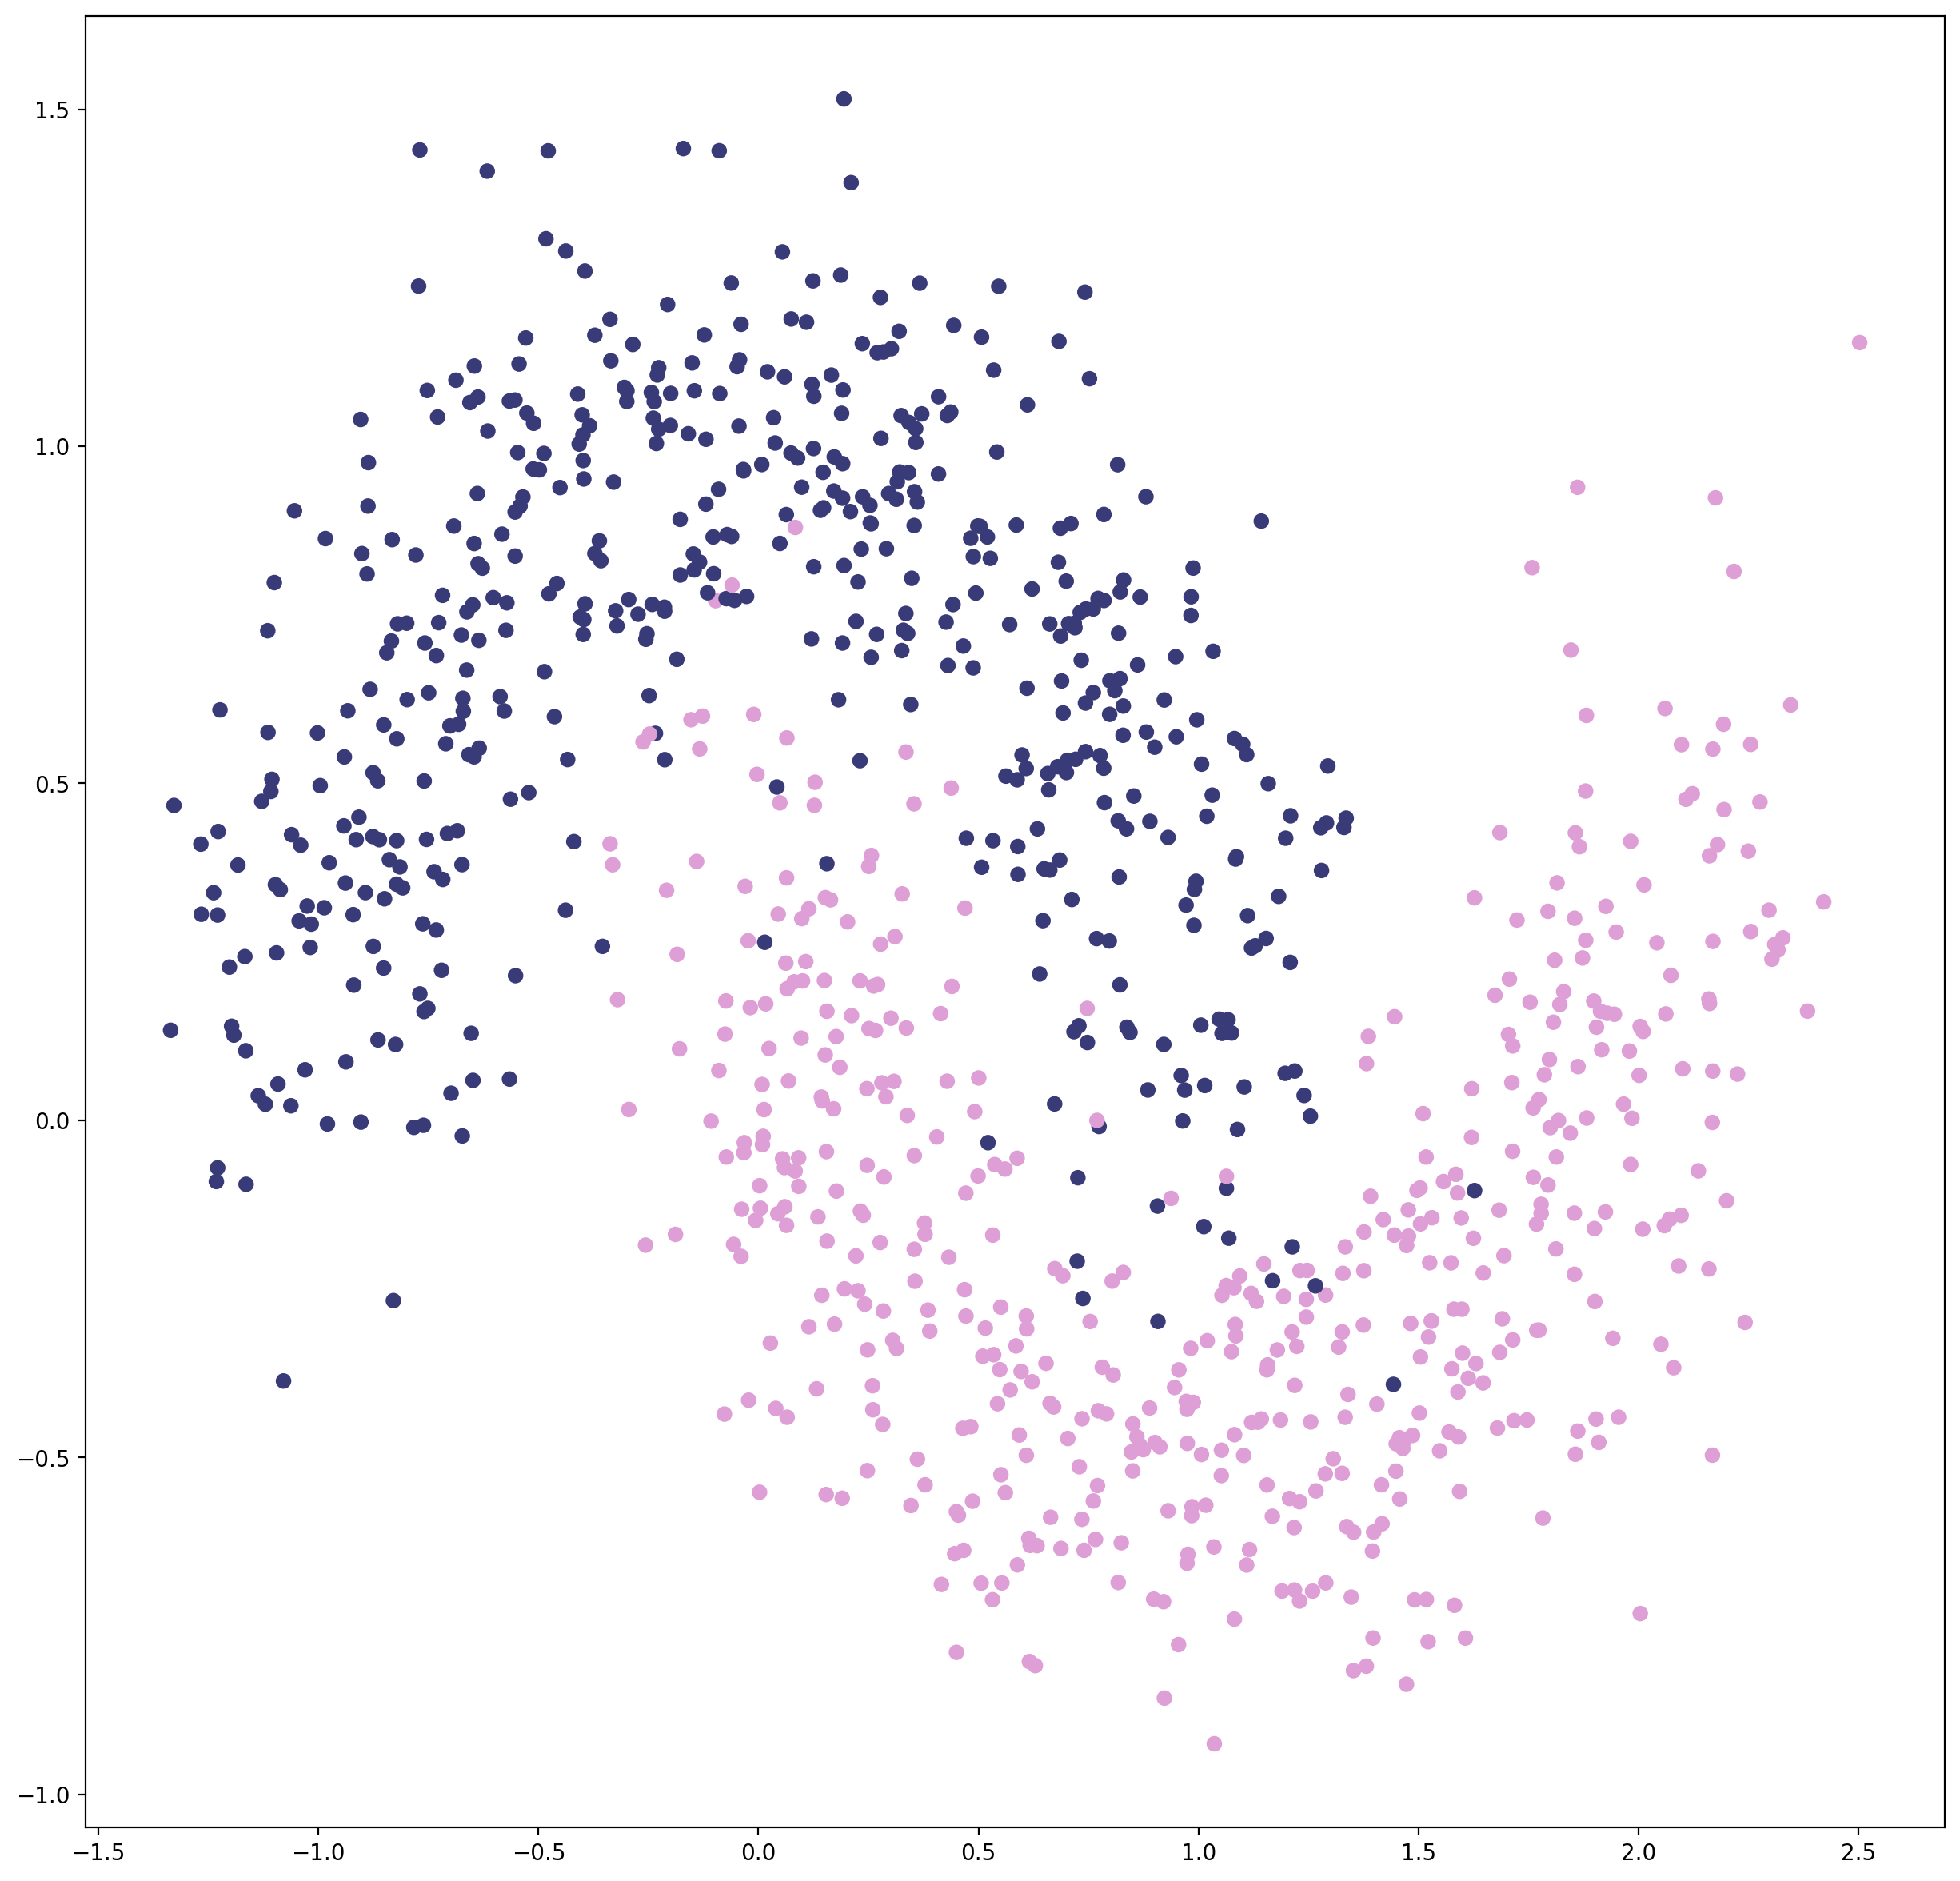

In [10]:
X, y = make_moons(n_samples=1000, random_state=42)
X = X + np.random.normal(0.0, 0.2, X.shape)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.tab20b)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Modelo 1: Rede neural com 5 elementos, sem regularização

In [11]:
m1 = Sequential()

m1.add(Dense(5, activation='relu', input_shape=(X.shape[1],)))
m1.add(Dense(1, activation='sigmoid'))

m1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time hist = m1.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_split=0.05)

print(m1.evaluate(X_test, y_test, verbose=0)[1])

Train on 760 samples, validate on 40 samples
Epoch 1/10
760/760 [==============================] - 0s 650us/sample - loss: 0.6452 - accuracy: 0.7316 - val_loss: 0.6450 - val_accuracy: 0.7250
Epoch 2/10
760/760 [==============================] - 0s 154us/sample - loss: 0.6272 - accuracy: 0.7737 - val_loss: 0.6286 - val_accuracy: 0.7750
Epoch 3/10
760/760 [==============================] - 0s 175us/sample - loss: 0.6102 - accuracy: 0.7566 - val_loss: 0.6116 - val_accuracy: 0.7750
Epoch 4/10
760/760 [==============================] - 0s 184us/sample - loss: 0.5929 - accuracy: 0.7618 - val_loss: 0.5939 - val_accuracy: 0.7500
Epoch 5/10
760/760 [==============================] - 0s 142us/sample - loss: 0.5752 - accuracy: 0.7829 - val_loss: 0.5771 - val_accuracy: 0.7500
Epoch 6/10
760/760 [==============================] - 0s 147us/sample - loss: 0.5571 - accuracy: 0.7921 - val_loss: 0.5591 - val_accuracy: 0.7750
Epoch 7/10
760/760 [==============================] - 0s 134us/sample - loss: 0

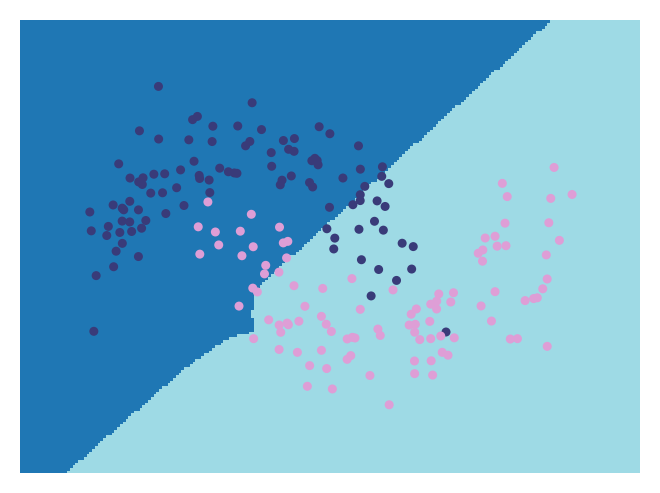

In [12]:
plot_decision_boundary(m1, X_test, y_test)

#### Modelo 3: Rede neural com 5 camadas de 200 elementos cada, sem regularização

In [13]:
m3 = Sequential()

m3.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(200, activation='relu'))
m3.add(Dense(1, activation='sigmoid'))

m3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time hist = m3.fit(X_train, y_train, batch_size=32, epochs=200, verbose=1, validation_split=0.05)

print(m3.evaluate(X_test, y_test, verbose=0)[1])

Train on 760 samples, validate on 40 samples
Epoch 1/200
760/760 [==============================] - 1s 1ms/sample - loss: 0.4336 - accuracy: 0.8303 - val_loss: 0.2430 - val_accuracy: 0.9000
Epoch 2/200
760/760 [==============================] - 0s 169us/sample - loss: 0.2974 - accuracy: 0.8763 - val_loss: 0.3332 - val_accuracy: 0.8250
Epoch 3/200
760/760 [==============================] - 0s 163us/sample - loss: 0.2385 - accuracy: 0.9013 - val_loss: 0.2327 - val_accuracy: 0.8500
Epoch 4/200
760/760 [==============================] - 0s 232us/sample - loss: 0.1951 - accuracy: 0.9303 - val_loss: 0.2267 - val_accuracy: 0.8750
Epoch 5/200
760/760 [==============================] - 0s 188us/sample - loss: 0.1585 - accuracy: 0.9408 - val_loss: 0.1671 - val_accuracy: 0.9500
Epoch 6/200
760/760 [==============================] - 0s 155us/sample - loss: 0.1378 - accuracy: 0.9553 - val_loss: 0.1297 - val_accuracy: 0.9750
Epoch 7/200
760/760 [==============================] - 0s 174us/sample - lo

760/760 [==============================] - 0s 189us/sample - loss: 0.0755 - accuracy: 0.9671 - val_loss: 0.0810 - val_accuracy: 0.9500
Epoch 112/200
760/760 [==============================] - 0s 130us/sample - loss: 0.0708 - accuracy: 0.9724 - val_loss: 0.0811 - val_accuracy: 0.9500
Epoch 113/200
760/760 [==============================] - 0s 166us/sample - loss: 0.0793 - accuracy: 0.9684 - val_loss: 0.1005 - val_accuracy: 0.9250
Epoch 114/200
760/760 [==============================] - 0s 141us/sample - loss: 0.0680 - accuracy: 0.9711 - val_loss: 0.0822 - val_accuracy: 0.9500
Epoch 115/200
760/760 [==============================] - 0s 166us/sample - loss: 0.0720 - accuracy: 0.9711 - val_loss: 0.0757 - val_accuracy: 0.9500
Epoch 116/200
760/760 [==============================] - 0s 152us/sample - loss: 0.0909 - accuracy: 0.9684 - val_loss: 0.0908 - val_accuracy: 0.9500
Epoch 117/200
760/760 [==============================] - 0s 152us/sample - loss: 0.0729 - accuracy: 0.9724 - val_loss: 0

760/760 [==============================] - 0s 187us/sample - loss: 0.0588 - accuracy: 0.9763 - val_loss: 0.0651 - val_accuracy: 0.9750
Epoch 167/200
760/760 [==============================] - 0s 167us/sample - loss: 0.0704 - accuracy: 0.9697 - val_loss: 0.1067 - val_accuracy: 0.9500
Epoch 168/200
760/760 [==============================] - 0s 170us/sample - loss: 0.0699 - accuracy: 0.9724 - val_loss: 0.0766 - val_accuracy: 0.9500
Epoch 169/200
760/760 [==============================] - 0s 188us/sample - loss: 0.0751 - accuracy: 0.9684 - val_loss: 0.0737 - val_accuracy: 0.9500
Epoch 170/200
760/760 [==============================] - 0s 136us/sample - loss: 0.0648 - accuracy: 0.9763 - val_loss: 0.0749 - val_accuracy: 0.9500
Epoch 171/200
760/760 [==============================] - 0s 188us/sample - loss: 0.0619 - accuracy: 0.9763 - val_loss: 0.0730 - val_accuracy: 0.9500
Epoch 172/200
760/760 [==============================] - 0s 163us/sample - loss: 0.0633 - accuracy: 0.9737 - val_loss: 0

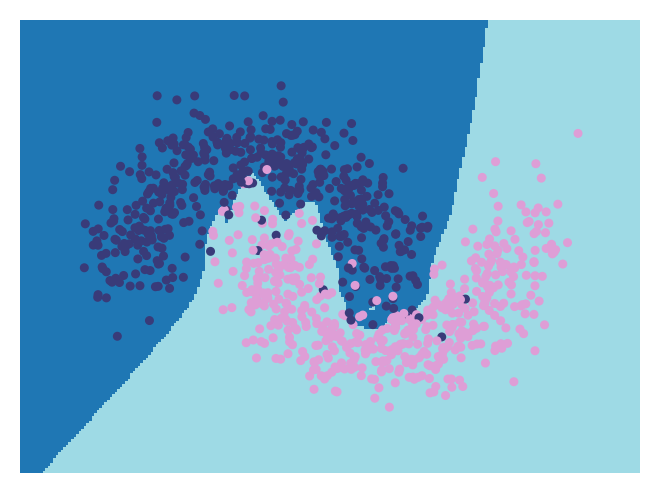

In [14]:
plot_decision_boundary(m3, X, y)

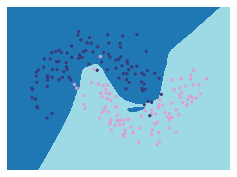

In [8]:
plot_decision_boundary(m3, X_test, y_test)

#### Modelo 3: Rede neural com 5 camadas de 200 elementos cada, com regularização L2

In [17]:
m_reg = Sequential()

m_reg.add(Dense(200, activation='relu', input_shape=(X.shape[1],)))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(200, activation='relu'))
m_reg.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(1.0)))

m_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time hist = m_reg.fit(X_train, y_train, batch_size=32, epochs=200, verbose=1, validation_split=0.05)

print(m_reg.evaluate(X_test, y_test, verbose=0)[1])

Train on 760 samples, validate on 40 samples
Epoch 1/200
760/760 [==============================] - 1s 1ms/sample - loss: 1.9641 - accuracy: 0.8526 - val_loss: 1.5074 - val_accuracy: 0.8250
Epoch 2/200
760/760 [==============================] - 0s 170us/sample - loss: 1.2419 - accuracy: 0.8711 - val_loss: 0.9789 - val_accuracy: 0.9000
Epoch 3/200
760/760 [==============================] - 0s 148us/sample - loss: 0.8397 - accuracy: 0.8974 - val_loss: 0.6995 - val_accuracy: 0.8500
Epoch 4/200
760/760 [==============================] - 0s 161us/sample - loss: 0.5768 - accuracy: 0.9092 - val_loss: 0.5034 - val_accuracy: 0.8750
Epoch 5/200
760/760 [==============================] - 0s 194us/sample - loss: 0.4164 - accuracy: 0.9211 - val_loss: 0.4337 - val_accuracy: 0.8250
Epoch 6/200
760/760 [==============================] - 0s 300us/sample - loss: 0.3126 - accuracy: 0.9303 - val_loss: 0.2936 - val_accuracy: 0.9000
Epoch 7/200
760/760 [==============================] - 0s 254us/sample - lo

760/760 [==============================] - 0s 161us/sample - loss: 0.0775 - accuracy: 0.9724 - val_loss: 0.1400 - val_accuracy: 0.9500
Epoch 112/200
760/760 [==============================] - 0s 180us/sample - loss: 0.0764 - accuracy: 0.9724 - val_loss: 0.1275 - val_accuracy: 0.9500
Epoch 113/200
760/760 [==============================] - 0s 170us/sample - loss: 0.0728 - accuracy: 0.9711 - val_loss: 0.1321 - val_accuracy: 0.9500
Epoch 114/200
760/760 [==============================] - 0s 175us/sample - loss: 0.0766 - accuracy: 0.9724 - val_loss: 0.1368 - val_accuracy: 0.9000
Epoch 115/200
760/760 [==============================] - 0s 320us/sample - loss: 0.0776 - accuracy: 0.9737 - val_loss: 0.1120 - val_accuracy: 0.9500
Epoch 116/200
760/760 [==============================] - 0s 180us/sample - loss: 0.0758 - accuracy: 0.9724 - val_loss: 0.1389 - val_accuracy: 0.9500
Epoch 117/200
760/760 [==============================] - 0s 177us/sample - loss: 0.0913 - accuracy: 0.9684 - val_loss: 0

760/760 [==============================] - 0s 166us/sample - loss: 0.0672 - accuracy: 0.9763 - val_loss: 0.1073 - val_accuracy: 0.9500
Epoch 167/200
760/760 [==============================] - 0s 177us/sample - loss: 0.0656 - accuracy: 0.9750 - val_loss: 0.1226 - val_accuracy: 0.9500
Epoch 168/200
760/760 [==============================] - 0s 168us/sample - loss: 0.0766 - accuracy: 0.9684 - val_loss: 0.1021 - val_accuracy: 0.9500
Epoch 169/200
760/760 [==============================] - 0s 155us/sample - loss: 0.0750 - accuracy: 0.9724 - val_loss: 0.1076 - val_accuracy: 0.9500
Epoch 170/200
760/760 [==============================] - 0s 148us/sample - loss: 0.0708 - accuracy: 0.9737 - val_loss: 0.1195 - val_accuracy: 0.9500
Epoch 171/200
760/760 [==============================] - 0s 171us/sample - loss: 0.0709 - accuracy: 0.9737 - val_loss: 0.1287 - val_accuracy: 0.9500
Epoch 172/200
760/760 [==============================] - 0s 188us/sample - loss: 0.0746 - accuracy: 0.9724 - val_loss: 0

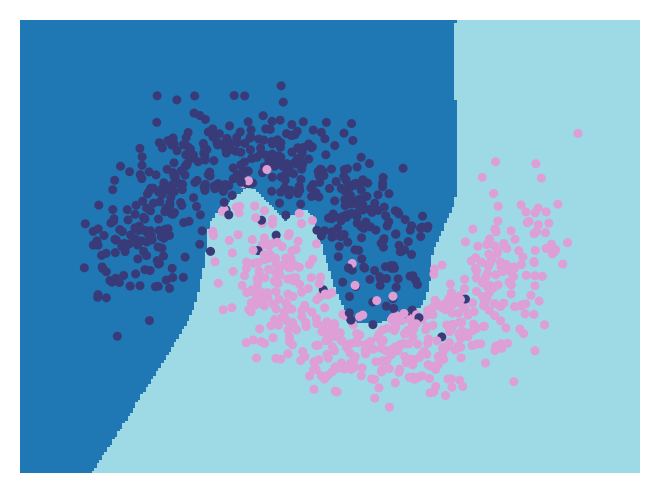

In [18]:
plot_decision_boundary(m_reg, X, y)

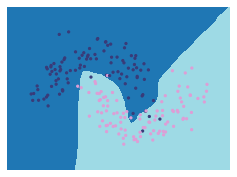

In [10]:
plot_decision_boundary(m_reg, X_test, y_test)

### Explorações:

- Treinar por menos iterações (epochs)
- Adicionar mais dados